# Exposures class

Exposure can describe the geographical distribution of people, livelihoods and assets or infrastructure; all items potentially exposed to hazards. It is represented in the class `Exposures`, which is a [GeoDataFrame](https://geopandas.readthedocs.io/en/latest/data_structures.html#geodataframe) of Python's library [geopandas](https://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html).

The variables (columns) and metada contained are:

 * tag (Tag): metada - information about the source data
 * ref_year (int): metada - reference year
 * value_unit (str): metada - unit of the exposures values
 * **latitude** (pd.Series): latitude
 * **longitude** (pd.Series): longitude
 * **value** (pd.Series): a value for each exposure
 * **if_*** (pd.Series): e.g. if_TC: impact functions ids for hazard TC. There might be different hazards defined: if_TC, if_FL, ...
 * geometry (pd.Series, optional): geometry of type Point of each instance. Computed in method `set_geometry_points()`
 * deductible (pd.Series, optional): deductible value for each exposure. Used for insurance
 * cover (pd.Series, optional): cover value for each exposure. Used for insurance
 * category_id (pd.Series, optional): category id (e.g. building code) for each exposure
 * region_id (pd.Series, optional): region id (e.g. country ISO code) for each exposure
 * centr_* (pd.Series, optional): e.g. centr_TC. centroids index for hazard TC. There might be different hazards defined: centr_TC, centr_FL, ... Computed in method `assign_centroids()`

Some of the variables are *optional*. This means that the package `climada.engine` also works without these variables. For instance, the `region_id` and `category_id` values only provide additional information, whilst the `centr_*` variable can be computed if not provided using the method `assign_centroids()`. The attibute `geometry` is only needed to execute the methods of `geopandas` and can be set using the method `set_geometry_points()`.

After defining an `Exposures` instance use always the `check()` method to see which attributes are missing. This method will raise an Error if `value`, `longitude`, `latitude` or `if_*` are not set.

## Define Exposures from a DataFrame

In [1]:
import numpy as np
from pandas import DataFrame
from climada.entity import Exposures

# Fill DataFrame
exp_df = DataFrame()
n_exp = 100*100
exp_df['value'] = np.arange(n_exp) # provide value
lat, lon = np.mgrid[15 : 35 : complex(0, np.sqrt(n_exp)), 20 : 40 : complex(0, np.sqrt(n_exp))]
exp_df['latitude'] = lat.flatten() # provide latitude
exp_df['longitude'] = lon.flatten() # provide longitude
exp_df['if_TC'] = np.ones(n_exp, int) # provide impact functions for TC or any other peril

print('\x1b[1;03;30;30m' + 'exp_df is a DataFrame:', str(type(exp_df)) + '\x1b[0m')
print('\x1b[1;03;30;30m' + 'exp_df looks like:' + '\x1b[0m')
print(exp_df.head())

# Generate Exposures
exp_df = Exposures(exp_df)
print('\n' + '\x1b[1;03;30;30m' + 'exp_df is now an Exposures:', str(type(exp_df)) + '\x1b[0m')
exp_df.set_geometry_points() # set geometry attribute (shapely Points) from GeoDataFrame from latitude and longitude
print('\n' + '\x1b[1;03;30;30m' + 'check method logs:' + '\x1b[0m')
exp_df.check() # puts metadata that has not been assigned

print('\n' + '\x1b[1;03;30;30m'  + 'exp_df looks like:' + '\x1b[0m')
print(exp_df.head())

2019-03-03 13:08:20,315 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


/Users/aznarsig/anaconda3/envs/climada_env_new/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


exp_df is a DataFrame: <class 'pandas.core.frame.DataFrame'>
exp_df looks like:
   value  latitude  longitude  if_TC
0      0      15.0  20.000000      1
1      1      15.0  20.202020      1
2      2      15.0  20.404040      1
3      3      15.0  20.606061      1
4      4      15.0  20.808081      1

exp_df is now an Exposures: <class 'climada.entity.exposures.base.Exposures'>
2019-03-03 13:08:21,488 - climada.entity.exposures.base - INFO - Setting geometry attribute.

check method logs:
2019-03-03 13:08:21,564 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326'}
2019-03-03 13:08:21,564 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2019-03-03 13:08:21,565 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2019-03-03 13:08:21,565 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2019-03-03 13:08:21,566 - climada.entity.exposure

## Define Exposures from a GeoDataFrame with POINT geometry

In [2]:
import numpy as np
import geopandas as gpd
from climada.entity import Exposures

# Fill GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
print('\x1b[1;03;30;30m' + 'World is a GeoDataFrame:', str(type(world)) + '\x1b[0m')
print('\x1b[1;03;30;30m' + 'World looks like:' + '\x1b[0m')
print(world.head())

# Generate Exposures
exp_gpd = Exposures(world)
print('\n' + '\x1b[1;03;30;30m' + 'exp_gpd is now an Exposures:', str(type(exp_gpd)) + '\x1b[0m')
exp_gpd['value'] = np.arange(world.shape[0]) # provide value
exp_gpd.set_lat_lon() # set latitude and longitude attributes from geometry
exp_gpd['if_TC'] = np.ones(world.shape[0], int) # provide impact functions for TC or any other peril

print('\n' + '\x1b[1;03;30;30m' + 'check method logs:' + '\x1b[0m')
exp_gpd.check() # puts metadata that has not been assigned

print('\n' + '\x1b[1;03;30;30m'  + 'exp_gpd looks like:' + '\x1b[0m')
print(exp_gpd.head())

World is a GeoDataFrame: <class 'geopandas.geodataframe.GeoDataFrame'>
World looks like:
           name                                     geometry
0  Vatican City  POINT (12.45338654497177 41.90328217996012)
1    San Marino    POINT (12.44177015780014 43.936095834768)
2         Vaduz  POINT (9.516669472907267 47.13372377429357)
3    Luxembourg  POINT (6.130002806227083 49.61166037912108)
4       Palikir  POINT (158.1499743237623 6.916643696007725)

exp_gpd is now an Exposures: <class 'climada.entity.exposures.base.Exposures'>
2019-03-03 13:08:21,610 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.

check method logs:
2019-03-03 13:08:21,624 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326'}
2019-03-03 13:08:21,625 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2019-03-03 13:08:21,625 - climada.entity.exposures.base - INFO - ref_year metadata set to default val

## Read Exposures of an excel file

Excel files can be ingested directly following the template provided in `climada_python/data/system/entity_template.xlsx`, in the sheet `assets`.

In [3]:
# An excel file with the variables defined in the template can be directly ingested using these commands
import pandas as pd
from climada.util.constants import ENT_TEMPLATE_XLS
from climada.entity import Exposures

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
exp_templ = pd.read_excel(file_name)

print('\x1b[1;03;30;30m' + 'exp_templ is a DataFrame:', str(type(exp_templ)) + '\x1b[0m')
print('\x1b[1;03;30;30m' + 'exp_templ looks like:' + '\x1b[0m')
print(exp_templ.head())

# Generate Exposures
exp_templ = Exposures(exp_templ)
print('\n' + '\x1b[1;03;30;30m' + 'exp_templ is now an Exposures:', str(type(exp_templ)) + '\x1b[0m')
exp_templ.set_geometry_points() # set geometry attribute (shapely Points) from GeoDataFrame from latitude and longitude
print('\n' + '\x1b[1;03;30;30m' + 'check method logs:' + '\x1b[0m')
exp_templ.check() # puts metadata that has not been assigned

print('\n' + '\x1b[1;03;30;30m'  + 'exp_templ looks like:' + '\x1b[0m')
print(exp_templ.head())

exp_templ is a DataFrame: <class 'pandas.core.frame.DataFrame'>
exp_templ looks like:
    latitude  longitude         value  deductible         cover  region_id  \
0  26.933899 -80.128799  1.392750e+10           0  1.392750e+10          1   
1  26.957203 -80.098284  1.259606e+10           0  1.259606e+10          1   
2  26.783846 -80.748947  1.259606e+10           0  1.259606e+10          1   
3  26.645524 -80.550704  1.259606e+10           0  1.259606e+10          1   
4  26.897796 -80.596929  1.259606e+10           0  1.259606e+10          1   

   category_id  if_TC  centr_TC  if_FL  centr_FL  
0            1      1         1      1         1  
1            1      1         2      1         2  
2            1      1         3      1         3  
3            1      1         4      1         4  
4            1      1         5      1         5  

exp_templ is now an Exposures: <class 'climada.entity.exposures.base.Exposures'>
2019-03-03 13:08:21,744 - climada.entity.exposures.base -

## Read Exposures of any file type supported by GeoDataFrame and DataFrame

Geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more, see [readers geopandas](http://geopandas.org/io.html). Pandas supports formats such as csv, html or sql; see [readers pandas](https://pandas.pydata.org/pandas-docs/stable/io.html). Using the corresponding readers, `DataFrame` and `GeoDataFrame` can be filled and provided to `Exposures` following the previous examples.

## Methods 

In [4]:
# read MATLAB file from climada MATLAB version
from climada.util.constants import ENT_DEMO_MAT

exp_mat = Exposures()
exp_mat.read_mat(ENT_DEMO_MAT)
exp_mat.check()
print(type(exp_mat))

2019-03-03 13:08:21,801 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326'}
2019-03-03 13:08:21,802 - climada.entity.exposures.base - INFO - geometry not set.
2019-03-03 13:08:21,803 - climada.entity.exposures.base - INFO - region_id not set.
<class 'climada.entity.exposures.base.Exposures'>


In [5]:
# add sea points
from climada.entity import add_sea
exp_templ_sea = add_sea(exp_templ, (10, 5)) # 10km from coast and at 5km resolution
exp_templ_sea.check()
exp_templ_sea.tail() # region_id set to -1 for the sea points

2019-03-03 13:08:21,812 - climada.entity.exposures.base - INFO - Adding sea at 5 km resolution and 10 km distance from coast.
2019-03-03 13:08:23,592 - climada.entity.exposures.base - INFO - Setting geometry attribute.


,latitude,longitude,value,deductible,cover,region_id,category_id,if_TC,centr_TC,if_FL,centr_FL,geometry
58,27.005495,-79.939012,0.0,0,0.0,-1,0,0,0,0,0,POINT (-79.93901179481654 27.00549520230383)
59,27.050492,-80.074001,0.0,0,0.0,-1,0,0,0,0,0,POINT (-80.07400099568045 27.05049160259181)
60,27.050492,-80.029005,0.0,0,0.0,-1,0,0,0,0,0,POINT (-80.02900459539248 27.05049160259181)
61,27.050492,-79.984008,0.0,0,0.0,-1,0,0,0,0,0,POINT (-79.98400819510451 27.05049160259181)
62,27.050492,-79.939012,0.0,0,0.0,-1,0,0,0,0,0,POINT (-79.93901179481654 27.05049160259181)


### all the methods from GeoDataFrame

Have a look into all the possible methods provided by `GeoDataFrame`. They will allow you to perform operations like the following:

In [6]:
# extract data in a region: latitudes between -5 and 5
sel_exp = exp_gpd.cx[:, -5:5]
sel_exp # the output is of type GeoDataFrame

,name,geometry,value,latitude,longitude,if_TC
9,Tarawa,POINT (173.0175708285494 1.338187505624603),9,1.338188,173.017571,1
13,Kigali,POINT (30.05858591906411 -1.95164421006325),13,-1.951644,30.058586,1
15,Juba,POINT (31.58002559278731 4.829975198277964),15,4.829975,31.580026,1
27,Bujumbura,POINT (29.3600060615284 -3.376087220374643),27,-3.376087,29.360006,1
48,Kampala,POINT (32.58137766712105 0.318604813383331),48,0.318605,32.581378,1
65,Mogadishu,POINT (45.36473175245874 2.068627192947531),65,2.068627,45.364732,1
79,Quito,POINT (-78.5019969671124 -0.2130423220355624),79,-0.213042,-78.501997,1
84,Malabo,POINT (8.783277545821136 3.750015278026183),84,3.750015,8.783278,1
90,Libreville,POINT (9.457965045823698 0.3853886097185182),90,0.385389,9.457965,1
98,Brazzaville,POINT (15.28274363384867 -4.257239913197509),98,-4.257240,15.282744,1


In [7]:
# extract data in a polygon
from shapely.geometry import Polygon

poly = Polygon([(0, -10), (0, 10), (10, 5)])
sel_exp = exp_gpd[exp_gpd.intersects(poly)]
sel_exp # the output is of type Exposures

,name,geometry,value,latitude,longitude,if_TC
36,Lome,POINT (1.22081126074562 6.133882930268385),36,6.133883,1.220811,1
84,Malabo,POINT (8.783277545821136 3.750015278026183),84,3.750015,8.783278,1
113,Cotonou,POINT (2.518044740568598 6.401954422782467),113,6.401954,2.518045,1
125,Sao Tome,POINT (6.733325153234773 0.3334021188329075),125,0.333402,6.733325,1


In [8]:
# change reference system
sel_exp.to_crs(epsg=3395, inplace=True) # use help to see more options: help(sel_exp.to_crs)
sel_exp.crs

/Users/aznarsig/anaconda3/envs/climada_env_new/lib/python3.6/site-packages/geopandas/geodataframe.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[geo_column_name] = level


{'init': 'epsg:3395', 'no_defs': True}

In [9]:
# concatenate exposures
import pandas as pd

exp_all = pd.concat([exp_templ, exp_df], ignore_index=True, sort=False)

# the output is of type Exposures
print('exp_all type and number of rows:', type(exp_all), exp_all.shape[0])

# NaNs will appear in the missing values
exp_all.tail()

exp_all type and number of rows: <class 'climada.entity.exposures.base.Exposures'> 10024


,latitude,longitude,value,deductible,cover,region_id,category_id,if_TC,centr_TC,if_FL,centr_FL,geometry
10019,35.0,39.191919,9995.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,POINT (39.19191919191919 35)
10020,35.0,39.393939,9996.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,POINT (39.39393939393939 35)
10021,35.0,39.595960,9997.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,POINT (39.5959595959596 35)
10022,35.0,39.797980,9998.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,POINT (39.7979797979798 35)
10023,35.0,40.000000,9999.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,POINT (40 35)


In [10]:
# remove values
exp_all_1 = exp_all.drop([1]) # delete row 1
print('\x1b[1;03;30;30m' + 'Row 1 deleted:' + '\x1b[0m')
print(exp_all_1.head())
exp_all_val = exp_all.drop(['value'], axis=1) # delete colomn 'value'
print('\x1b[1;03;30;30m' + 'Column value deleted:' + '\x1b[0m')
print(exp_all_val.head())

Row 1 deleted:
    latitude  longitude         value  deductible         cover  region_id  \
0  26.933899 -80.128799  1.392750e+10         0.0  1.392750e+10        1.0   
2  26.783846 -80.748947  1.259606e+10         0.0  1.259606e+10        1.0   
3  26.645524 -80.550704  1.259606e+10         0.0  1.259606e+10        1.0   
4  26.897796 -80.596929  1.259606e+10         0.0  1.259606e+10        1.0   
5  26.925359 -80.220966  1.259606e+10         0.0  1.259606e+10        1.0   

   category_id  if_TC  centr_TC  if_FL  centr_FL                      geometry  
0          1.0      1       1.0    1.0       1.0  POINT (-80.128799 26.933899)  
2          1.0      1       3.0    1.0       3.0  POINT (-80.748947 26.783846)  
3          1.0      1       4.0    1.0       4.0  POINT (-80.550704 26.645524)  
4          1.0      1       5.0    1.0       5.0  POINT (-80.596929 26.897796)  
5          1.0      1       6.0    1.0       6.0  POINT (-80.220966 26.925359)  
Column value deleted:
    lati

## Visualize Exposures

The method `plot_hexbin()` uses `cartopy`  and `matplotlib`'s `hexbin` function to represent the exposures values as 2d bins over a map. Configure your plot by fixing the different inputs of the method or by modifying the returned `matplotlib` figure and axes.

Plotting exp_df.


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x11407acc0>]],
       dtype=object))

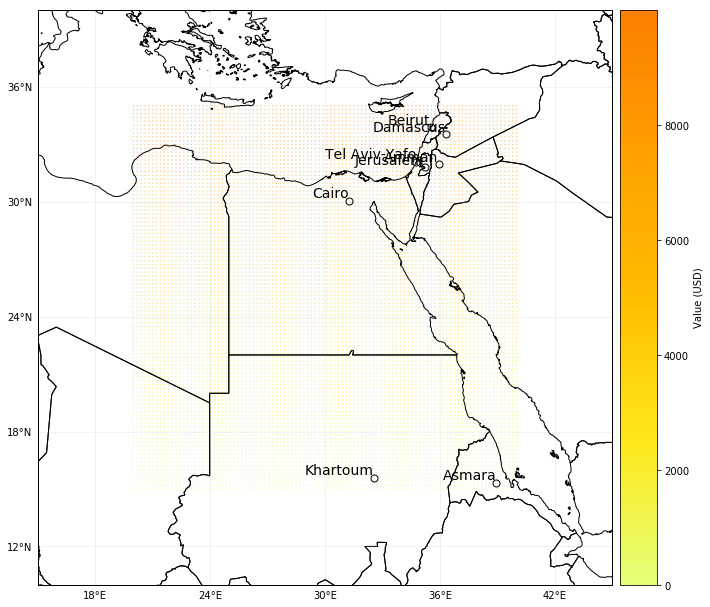

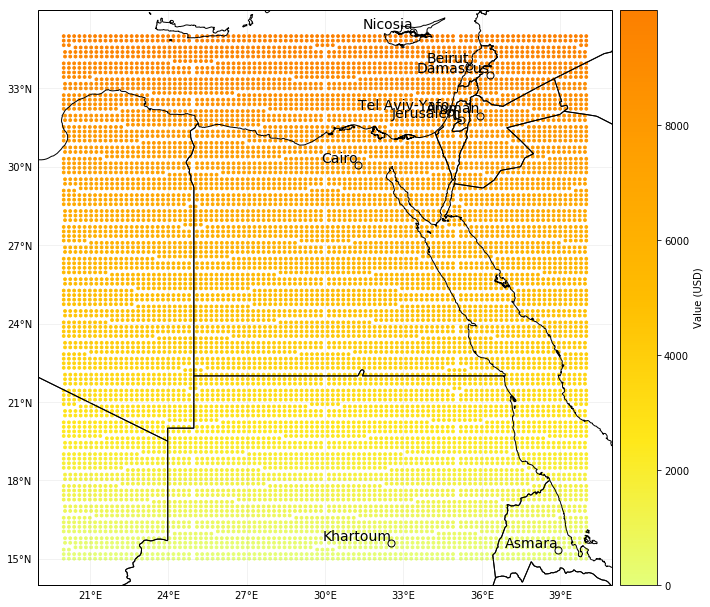

In [11]:
# execute 'Define Exposures from a DataFrame' to see the results
print('\x1b[1;03;30;30m' + 'Plotting exp_df.' + '\x1b[0m')
fig, axs = exp_df.plot_hexbin()
axs[0, 0].set_xlim(15, 45) # modify x-axis borders
axs[0, 0].set_ylim(10, 40) # modify y-axis borders

# use buffer option to enlarge borders of plot
# use gridsize to change bins size
exp_df.plot_hexbin(pop_name=False, buffer=1.0, gridsize=200)

Plotting exp_gpd.
2019-03-03 13:08:35,456 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x11439c9e8>]],
       dtype=object))

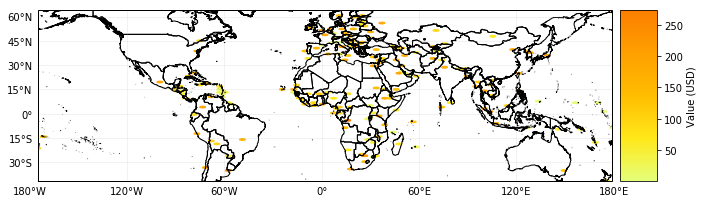

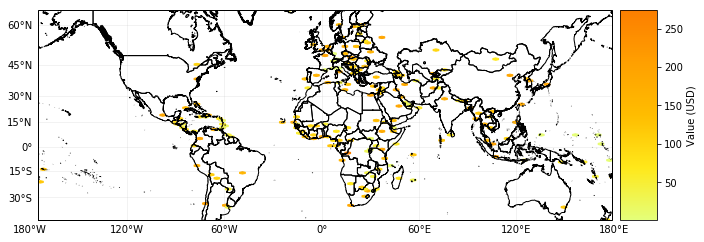

In [12]:
# execute 'Define Exposures from a GeoDataFrame with POINT geometry' to see the results
print('\x1b[1;03;30;30m' + 'Plotting exp_gpd.' + '\x1b[0m')
exp_gpd.plot_hexbin(pop_name=False)

# when the geometry is changed, the plot is adapted correspondingly
exp_gpd.to_crs({'init':'epsg:3395'}, inplace=True)
exp_gpd.plot_hexbin(pop_name=False)

The method `plot_scatter()` uses `cartopy` and `matplotlib`'s `scatter` function to represent the points values over a 2d map. As usal, it returns the figure and axes, which can be modify aftwerwards.

2019-03-03 13:08:52,876 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a2788dfd0>]],
       dtype=object))

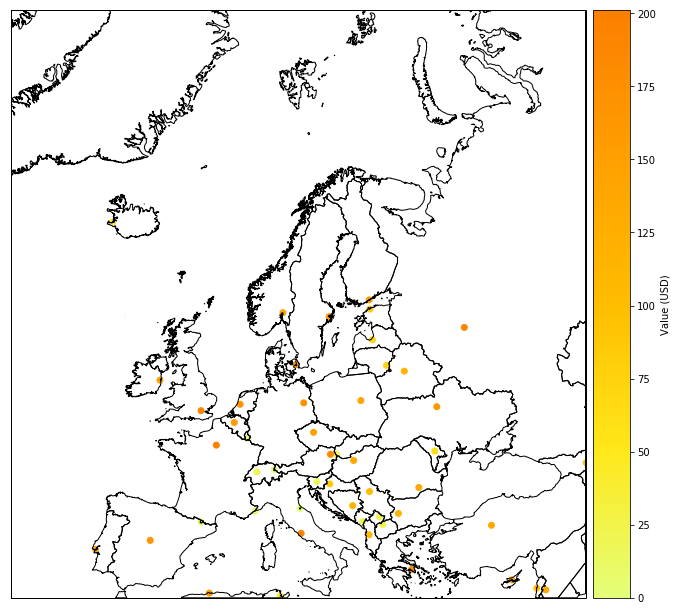

In [13]:
exp_gpd.to_crs({'init':'epsg:3035'}, inplace=True)
exp_gpd.plot_scatter(pop_name=False)

The method `plot_raster()` rasterizes the points into the given resolution. Use the `save_tiff` option to save the resulting `tiff` file.

2019-03-03 13:09:00,571 - climada.entity.exposures.base - INFO - Raster from resolution 0.20202020202019355° to 0.20202020202019355°.
2019-03-03 13:09:05,689 - climada.entity.exposures.base - INFO - Raster from resolution 0.20202020202019355° to 0.5°.


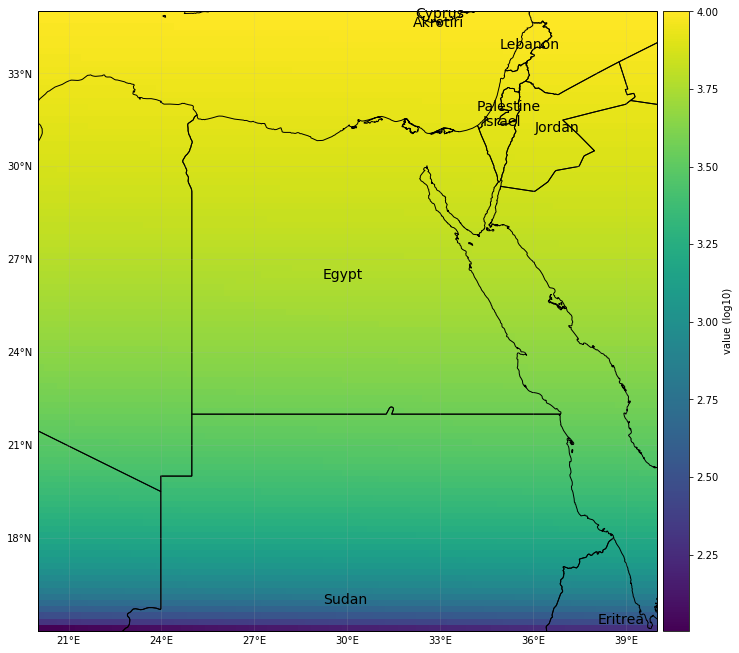

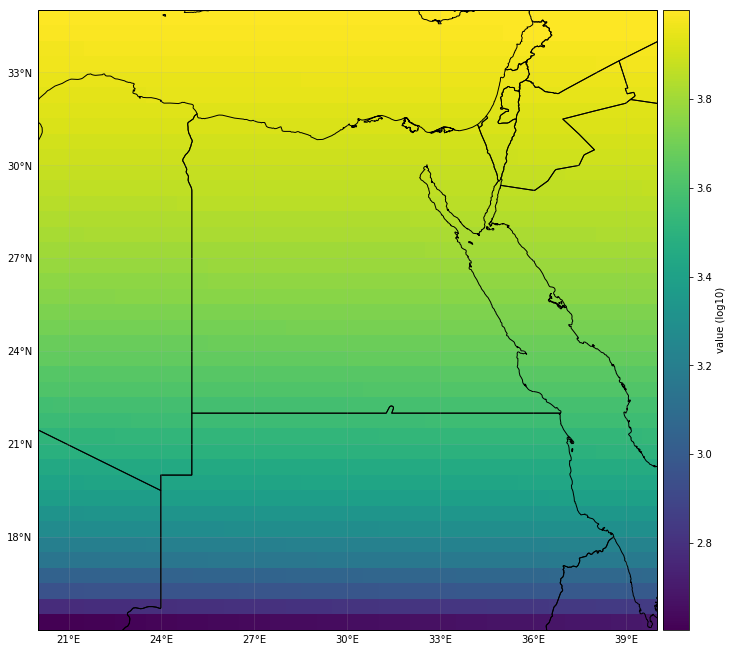

In [14]:
from climada.util.plot import add_cntry_names # use climada's plotting utilities
fig, ax = exp_df.plot_raster() # plot with same resolution as data
add_cntry_names(ax[0, 0], [exp_df.longitude.min(), exp_df.longitude.max(), exp_df.latitude.min(), exp_df.latitude.max()])

# use plot_raster(save_tiff) to save the corresponding raster in tiff format
# change raster resolution
fig, ax = exp_df.plot_raster(raster_res=0.5, save_tiff='results/exp_df.tiff') 

Since `Exposures` is a `GeoDataFrame`, any function for visualization from geopandas can be used. Check [making maps](https://geopandas.readthedocs.io/en/latest/mapping.html#) and [examples gallery](http://geopandas.org/gallery/index.html).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a273a8320>]],
      dtype=object)

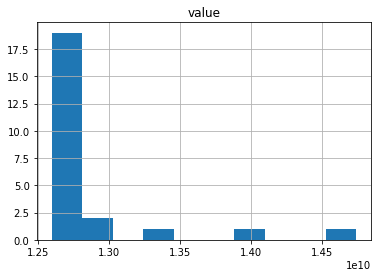

In [15]:
# other visualization types
exp_templ.hist(column='value')

## Write Exposures

Exposures can be saved in any format available for `GeoDataFrame` (see fiona.supported_drivers) and `DataFrame` ([pandas IO tools]('https://pandas.pydata.org/pandas-docs/stable/io.html')). Take into account that in many of these formats the metadata (e.g. variables `ref_year`, `value_unit` and `tag`) will not be saved. Use instead the format hdf5 provided by `Exposures` methods `write_hdf5()` and `read_hdf5()` to handle all the data.

In [16]:
# GeoDataFrame formats
import fiona; fiona.supported_drivers

# GeoDataFrame default: ESRI shape file in current path. metadata not saved!
exp_templ.to_file('results/exp_templ')

# DataFrame save to csv format. geometry writen as string, metadata not saved!
exp_templ.to_csv('results/exp_templ_csv', sep='\t')

In [17]:
# write
exp_templ.write_hdf5('results/exp_temp.h5')
# read
exp_read = Exposures()
exp_read.read_hdf5('results/exp_temp.h5')
exp_read.head()

/Users/aznarsig/anaconda3/envs/climada_env_new/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['geometry']]

  exec(code_obj, self.user_global_ns, self.user_ns)


,latitude,longitude,value,deductible,cover,region_id,category_id,if_TC,centr_TC,if_FL,centr_FL,geometry
0,26.933899,-80.128799,1.392750e+10,0,1.392750e+10,1,1,1,1,1,1,POINT (-80.128799 26.933899)
1,26.957203,-80.098284,1.259606e+10,0,1.259606e+10,1,1,1,2,1,2,POINT (-80.09828400000001 26.957203)
2,26.783846,-80.748947,1.259606e+10,0,1.259606e+10,1,1,1,3,1,3,POINT (-80.748947 26.783846)
3,26.645524,-80.550704,1.259606e+10,0,1.259606e+10,1,1,1,4,1,4,POINT (-80.550704 26.645524)
4,26.897796,-80.596929,1.259606e+10,0,1.259606e+10,1,1,1,5,1,5,POINT (-80.596929 26.897796)


Finallly, as with any Python object, use climada's save option to save it in pickle format.

In [18]:
# save in pickle format
from climada.util.save import save
# this generates a results folder in the current path and stores the output there
save('exp_templ.pkl.p', exp_templ) # creates results folder and stores there

2019-03-03 13:09:10,553 - climada.util.save - INFO - Written file /Users/aznarsig/Documents/Python/climada_python/script/tutorial/results/exp_templ.pkl.p
